In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.metrics import roc_curve, auc, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = ['NumberTimesPregnant', 'PlasmaGlucose', 'BloodPressure', 'TricepsFoldThickness', 'SerumInsulin', 'BMI', 'Pedigree', 'Age', 'ClassVariable']

data = pd.read_csv('pima-indians-diabetes.csv', names=column_names)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NumberTimesPregnant   768 non-null    int64  
 1   PlasmaGlucose         768 non-null    int64  
 2   BloodPressure         768 non-null    int64  
 3   TricepsFoldThickness  768 non-null    int64  
 4   SerumInsulin          768 non-null    int64  
 5   BMI                   768 non-null    float64
 6   Pedigree              768 non-null    float64
 7   Age                   768 non-null    int64  
 8   ClassVariable         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data.describe()

,NumberTimesPregnant,PlasmaGlucose,BloodPressure,TricepsFoldThickness,SerumInsulin,BMI,Pedigree,Age,ClassVariable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
print('Shape of data is : ', data.shape)

Shape of data is :  (768, 9)


In [5]:
data.isna().sum()

NumberTimesPregnant     0
PlasmaGlucose           0
BloodPressure           0
TricepsFoldThickness    0
SerumInsulin            0
BMI                     0
Pedigree                0
Age                     0
ClassVariable           0
dtype: int64

In [10]:
data.head()

,NumberTimesPregnant,PlasmaGlucose,BloodPressure,TricepsFoldThickness,SerumInsulin,BMI,Pedigree,Age,ClassVariable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
X = data.drop('ClassVariable', axis = 1)
Y = data['ClassVariable']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
model = GaussianNB()

In [15]:
model.fit(x_train, y_train)

GaussianNB()

In [16]:
y_pred = model.predict(x_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy is : {accuracy}')
print(f'Precision is : {precision}')
print(f'Recall is : {recall}')
print(f'F1 score is : {f1score}')


print(f'Classification report is : \n {classification_rep}')
print(f'Confusion matrix is : \n{conf_matrix}')

Accuracy is : 0.7662337662337663
Precision is : 0.6610169491525424
Recall is : 0.7090909090909091
F1 score is : 0.6842105263157895
Classification report is : 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Confusion matrix is : 
[[79 20]
 [16 39]]


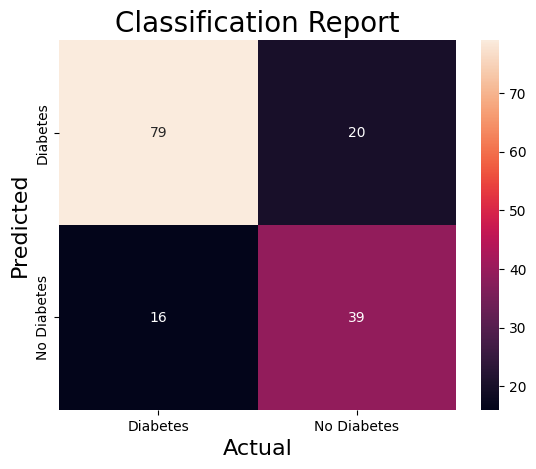

In [21]:
sns.heatmap(conf_matrix,
            fmt='g',
            xticklabels=['Diabetes', 'No Diabetes'],
            yticklabels=['Diabetes', 'No Diabetes'],
            annot=True
            )

plt.xlabel('Actual', fontsize=16)
plt.ylabel('Predicted', fontsize=16)
plt.title('Classification Report', fontsize=20)
plt.show()

In [26]:
# Probability Prediction

y_proba = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = auc(fpr, tpr)

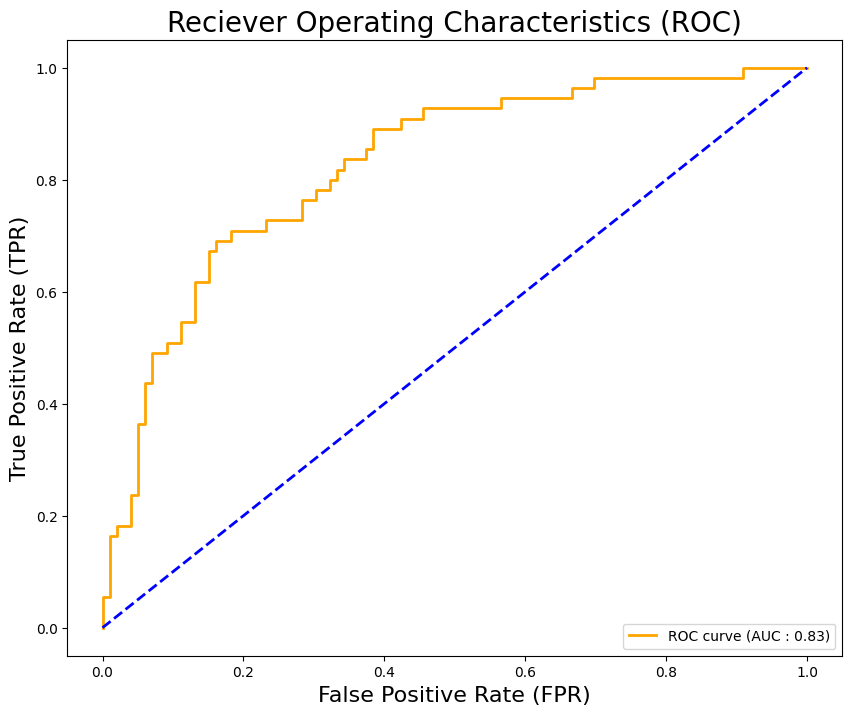

In [27]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr ,lw= 2, color = 'orange', label = f'ROC curve (AUC : {roc_auc:.2f})')
plt.plot([0, 1],[0, 1], color = 'blue', lw = 2, linestyle='--')
plt.title('Reciever Operating Characteristics (ROC)', fontsize=20)
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.legend(loc = 'lower right')
plt.show()